## 더미 데이터 넣어서 프레임 구조 확인

In [19]:
import pandas as pd
from pprint import pprint

sample_data=pd.read_json('../data/cleaned_data.json')

df = pd.DataFrame(sample_data)
pprint(df.head())

    company        title job_group job_subgroup employment_type   location  \
0  ABC Corp   백엔드 개발자 채용        IT          백엔드             정규직  서울시 > 강남구   
1  company1  프론트엔드 인턴 모집        IT        프론트엔드              인턴  서울시 > 마포구   
2  company2      데이터 분석가       데이터        데이터분석             계약직   경기 > 성남시   
3  company3       마케팅 인턴       마케팅       콘텐츠마케팅              인턴  부산 > 해운대구   
4  company4      백엔드 개발자        IT          백엔드             정규직  서울시 > 종로구   

    salary career education    deadline   company_tags probation  \
0  4,000만원  5년 이상     대졸 이상  2025-05-10   [유연근무, 자율복장]             
1  월 150만원  5년 이상        무관  2025-04-25  [스타트업, 점심 제공]             
2  3,500만원  1년 이상     대졸 이상  2025-05-01        [AI 기업]             
3  월 130만원     신입        무관  2025-04-30        [MZ 기업]        협의   
4       협의     무관     대졸 이상  2025-05-15         [복지카페]             

  probation_months probation_years probation_weeks city  
0                3                                   서울  
1     

## 지역별 채용 공고 수 분포

In [20]:
city_counts = df['city'].value_counts()
print(city_counts)

city
서울    6
부산    2
성남    1
대전    1
수원    1
인천    1
대구    1
고양    1
세종    1
Name: count, dtype: int64


In [60]:
#시각화 
%pip install folium
import streamlit as st

Note: you may need to restart the kernel to use updated packages.


In [94]:
city_counts = df['city'].value_counts().reset_index()
city_counts.columns = ['city', 'count']

city_coords = { #주요 도시 좌표 매핑
    "서울": [37.5665, 126.9780],
    "부산": [35.1796, 129.0756],
    "대구": [35.8722, 128.6025],
    "광주": [35.1595, 126.8526],
    "대전": [36.3504, 127.3845],
    "세종": [36.4800, 127.2890],
    "수원": [37.2636, 127.0286],
    "제주": [33.4996, 126.5312],
    "창원": [35.2283, 128.6811]
}

import folium


# 지도 생성 (중심은 한국 중부)
job_map = folium.Map(location=[36.5, 127.8], zoom_start=8)

# 마커 추가
for _, row in city_counts.iterrows():
    city = row['city']
    count = row['count']
    coords = city_coords.get(city)

    if coords:
       folium.Marker(
            location=coords,
            icon=folium.DivIcon(html=f"""
        <div style="
            width: 40px;
            height: 40px;
            background-color: rgba(255, 255, 255, 0.8);  /* 연한 빨강 배경 */
            color: #0037FFFF;                           /* 진한 빨강 글씨 */
            border: 2px solid #3F3F3FFF;
            border-radius: 50%;                       /* 동그라미 핵심 */
            font-size: 15px;
            font-weight: bold;
            display: flex;
            align-items: center;
            justify-content: center;
            text-align: center;
            box-shadow: 1px 1px 3px rgba(0,0,0,0.2);
        ">
            {count}
        </div>
    """),
            tooltip=city  # 마우스를 올리면 도시명
        ).add_to(job_map)
# 결과 저장 (혹은 Streamlit에서 바로 출력 가능)
job_map.save("city_job_marker_map.html")


### 지역별 직군 분포 테이블

In [21]:
city_job_dist = pd.crosstab(df['city'],df['job_group'])
print(city_job_dist)

job_group  IT  경영지원  데이터  디자인  마케팅
city                              
고양          1     0    0    0    0
대구          0     1    0    0    0
대전          0     0    1    0    0
부산          1     0    0    0    1
서울          3     1    1    1    0
성남          0     0    1    0    0
세종          0     0    1    0    0
수원          0     0    0    1    0
인천          0     0    0    0    1


## 고용 형태 분포 확인

In [22]:
print(df['employment_type'].value_counts())

employment_type
정규직    7
인턴     4
계약직    4
Name: count, dtype: int64


### 직군별 고용 형태 분포 테이블

In [23]:
job_employment_dist = pd.crosstab(df['job_group'],df['employment_type'])
print(job_employment_dist)

employment_type  계약직  인턴  정규직
job_group                    
IT                 1   1    3
경영지원               1   1    0
데이터                2   1    1
디자인                0   0    2
마케팅                0   1    1


### 하위 직군별 고용 형태 분포 테이블
* job_group > job_subgroup 
* 계층적으로 고용형태 분포

In [24]:
subjob_employment_dist = pd.crosstab([df['job_group'],df['job_subgroup']],df['employment_type'])

print(subjob_employment_dist)

employment_type         계약직  인턴  정규직
job_group job_subgroup              
IT        백엔드             1   0    2
          프론트엔드           0   1    1
경영지원      인사/총무           1   1    0
데이터       데이터리서치          1   0    0
          데이터분석           1   1    0
          데이터엔지니어링        0   0    1
디자인       UI/UX           0   0    1
          그래픽디자인          0   0    1
마케팅       브랜드마케팅          0   0    1
          콘텐츠마케팅          0   1    0


## 경력 사항 분포 확인

In [25]:
print(df['career'].value_counts())

career
무관       5
1년 이상    3
2년 이상    3
5년 이상    2
신입       1
4년 이상    1
Name: count, dtype: int64


### 직군별 경력 사항 분포 테이블

In [29]:
job_career_dist = pd.crosstab(df['job_group'],df['career'])
print(job_career_dist)

career     1년 이상  2년 이상  4년 이상  5년 이상  무관  신입
job_group                                    
IT             1      1      0      2   1   0
경영지원           0      0      0      0   2   0
데이터            2      0      1      0   1   0
디자인            0      1      0      0   1   0
마케팅            0      1      0      0   0   1


In [33]:
# 직군별 평균 경력 연차
career_to_year = {
    '1년 이상': 1,
    '2년 이상': 2,
    '3년 이상': 3,
    '4년 이상': 4,
    '5년 이상': 5,
    '무관': 0,
    '신입': 0
}

# 경력 연차 * 해당 count → 총합
numerator = job_career_dist.mul([career_to_year.get(c, 0) for c in job_career_dist.columns], axis=1).sum(axis=1)

# 전체 공고 수
denominator = job_career_dist.sum(axis=1)

# 평균 연차 = 총합 / 개수
job_group_avg_years = (numerator / denominator).round(2)

print(job_group_avg_years)

job_group
IT      2.6
경영지원    0.0
데이터     1.5
디자인     1.0
마케팅     1.0
dtype: float64


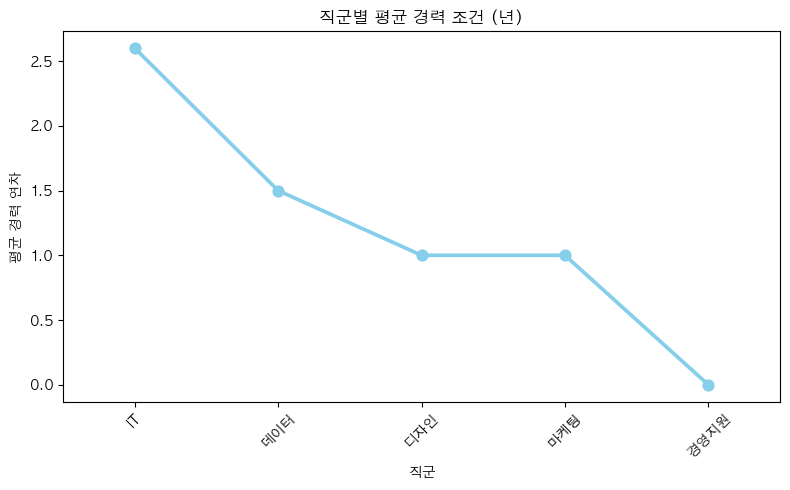

In [50]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import platform

if platform.system() == 'Darwin':  # macOS
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # Windows
    plt.rc('font', family='Malgun Gothic')
else:  # Linux (colab, ubuntu 등)
    plt.rc('font', family='NanumGothic')

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# Series를 DataFrame으로 변환
df_avg = job_group_avg_years.reset_index()
df_avg.columns = ['job_group', 'career_years']

# 시각화
plt.figure(figsize=(8, 5))
sns.pointplot(data=df_avg.sort_values(by='career_years',ascending=False), x='job_group', y='career_years', color='skyblue')

plt.title("직군별 평균 경력 조건 (년)")
plt.xlabel("직군")
plt.ylabel("평균 경력 연차")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 하위 직군별 경력 사항 분포 테이블
* job_group > job_subgroup 
* 계층적으로 경력사항 분포

In [27]:
subjob_career_dist = pd.crosstab([df['job_group'],df['job_subgroup']],df['career'])
print(subjob_career_dist)

career                  1년 이상  2년 이상  4년 이상  5년 이상  무관  신입
job_group job_subgroup                                    
IT        백엔드               1      0      0      1   1   0
          프론트엔드             0      1      0      1   0   0
경영지원      인사/총무             0      0      0      0   2   0
데이터       데이터리서치            1      0      0      0   0   0
          데이터분석             1      0      0      0   1   0
          데이터엔지니어링          0      0      1      0   0   0
디자인       UI/UX             0      1      0      0   0   0
          그래픽디자인            0      0      0      0   1   0
마케팅       브랜드마케팅            0      1      0      0   0   0
          콘텐츠마케팅            0      0      0      0   0   1


In [51]:
# 직군별 평균 경력 연차
career_to_year = {
    '1년 이상': 1,
    '2년 이상': 2,
    '3년 이상': 3,
    '4년 이상': 4,
    '5년 이상': 5,
    '무관': 0,
    '신입': 0
}

# 각 셀에 경력 연차 수치 곱하기
weighted = subjob_career_dist.mul([career_to_year.get(c, 0) for c in subjob_career_dist.columns], axis=1)

# 평균 = 총합 / 전체 공고 수
numerator = weighted.sum(axis=1)
denominator = subjob_career_dist.sum(axis=1)
subjob_avg_years = (numerator / denominator).round(2)

# 결과를 DataFrame으로 정리
df_subjob_avg = subjob_avg_years.reset_index()
df_subjob_avg.columns = ['job_group', 'job_subgroup', 'career_years']

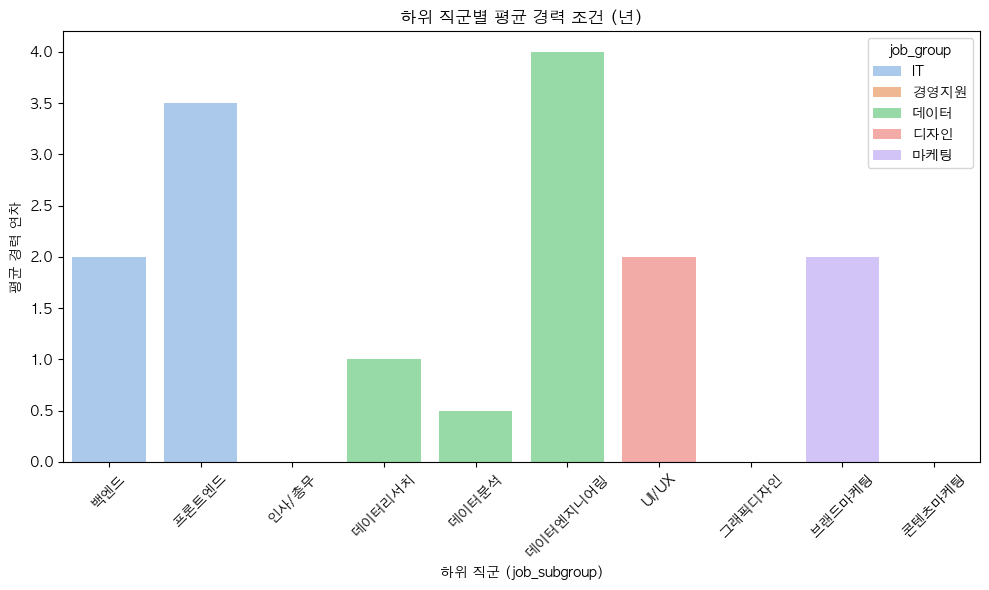

In [52]:
#시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=df_subjob_avg, x='job_subgroup', y='career_years', hue='job_group', palette='pastel')

plt.title("하위 직군별 평균 경력 조건 (년)")
plt.xlabel("하위 직군 (job_subgroup)")
plt.ylabel("평균 경력 연차")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()